In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
base_plano = pd.read_csv("plano_saude.csv")
base_plano

,idade,custo
0,18,871
1,23,1100
2,25,1393
3,33,1654
4,34,1915
5,43,2100
6,48,2356
7,51,2698
8,58,2959
9,63,3000


# Regressão Linear Simples

In [28]:
def PrevisaoRegressaoLinear(x,y,v):
    x = np.array(x)
    y = np.array(y)
    
    cov_xy = np.corrcoef(x, y)[0,1]
    inclinacao = cov_xy*(np.std(y)/np.std(x))
    interseccao = np.mean(y) - inclinacao * np.mean(x)
    previsao = interseccao + inclinacao * v
    return float(previsao)

In [29]:
x = base_plano['idade']
y = base_plano['custo']

lr = PrevisaoRegressaoLinear(x,y,54)
lr

2657.3594760672704

<Axes: >

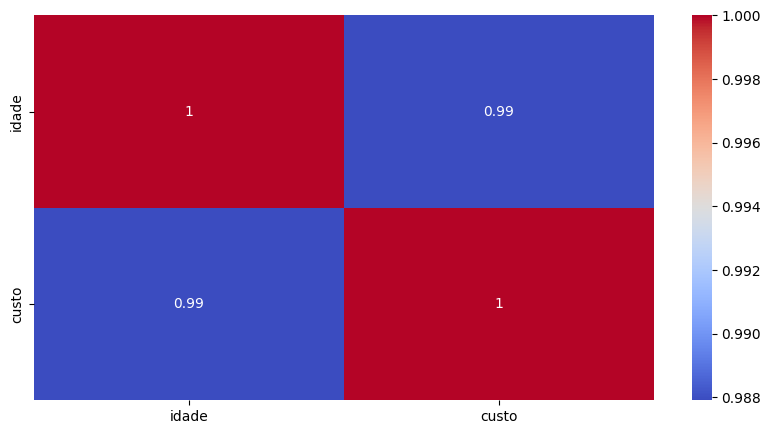

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(base_plano.corr(), annot=True, cmap="coolwarm")

In [31]:
x = x.values.reshape(-1,1)
x.shape

(11, 1)

In [32]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x,y)

LinearRegression()

In [33]:
regressor_plano_saude.intercept_

149.05772962483752

In [34]:
regressor_plano_saude.coef_

array([46.45003234])

In [35]:
previsoes = regressor_plano_saude.predict(x)
previsoes

array([ 985.15831177, 1217.40847348, 1310.30853816, 1681.9087969 ,
       1728.35882924, 2146.40912031, 2378.65928202, 2518.00937904,
       2843.15960543, 3075.40976714, 3261.20989651])

In [36]:
grafico = px.scatter(x = x.ravel(), y = y)
grafico.add_scatter(x = x.ravel(), y = previsoes, name= 'Regressão') 
#ravel converte para numpy array
grafico.show()

In [37]:
previsao_54 = regressor_plano_saude.predict([[54]])
print(f"previsão: {previsao_54[0]:.2f}")

previsão: 2657.36


In [38]:
regressor_plano_saude.score(x.reshape(-1,1), y)

0.9759542217686598

# Regressão Linear Múltipla

In [39]:
base_casas = pd.read_csv('house_prices.csv')
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [40]:
base_casas.drop('date', axis=1, inplace=True)

In [41]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [42]:
base_casas.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: >

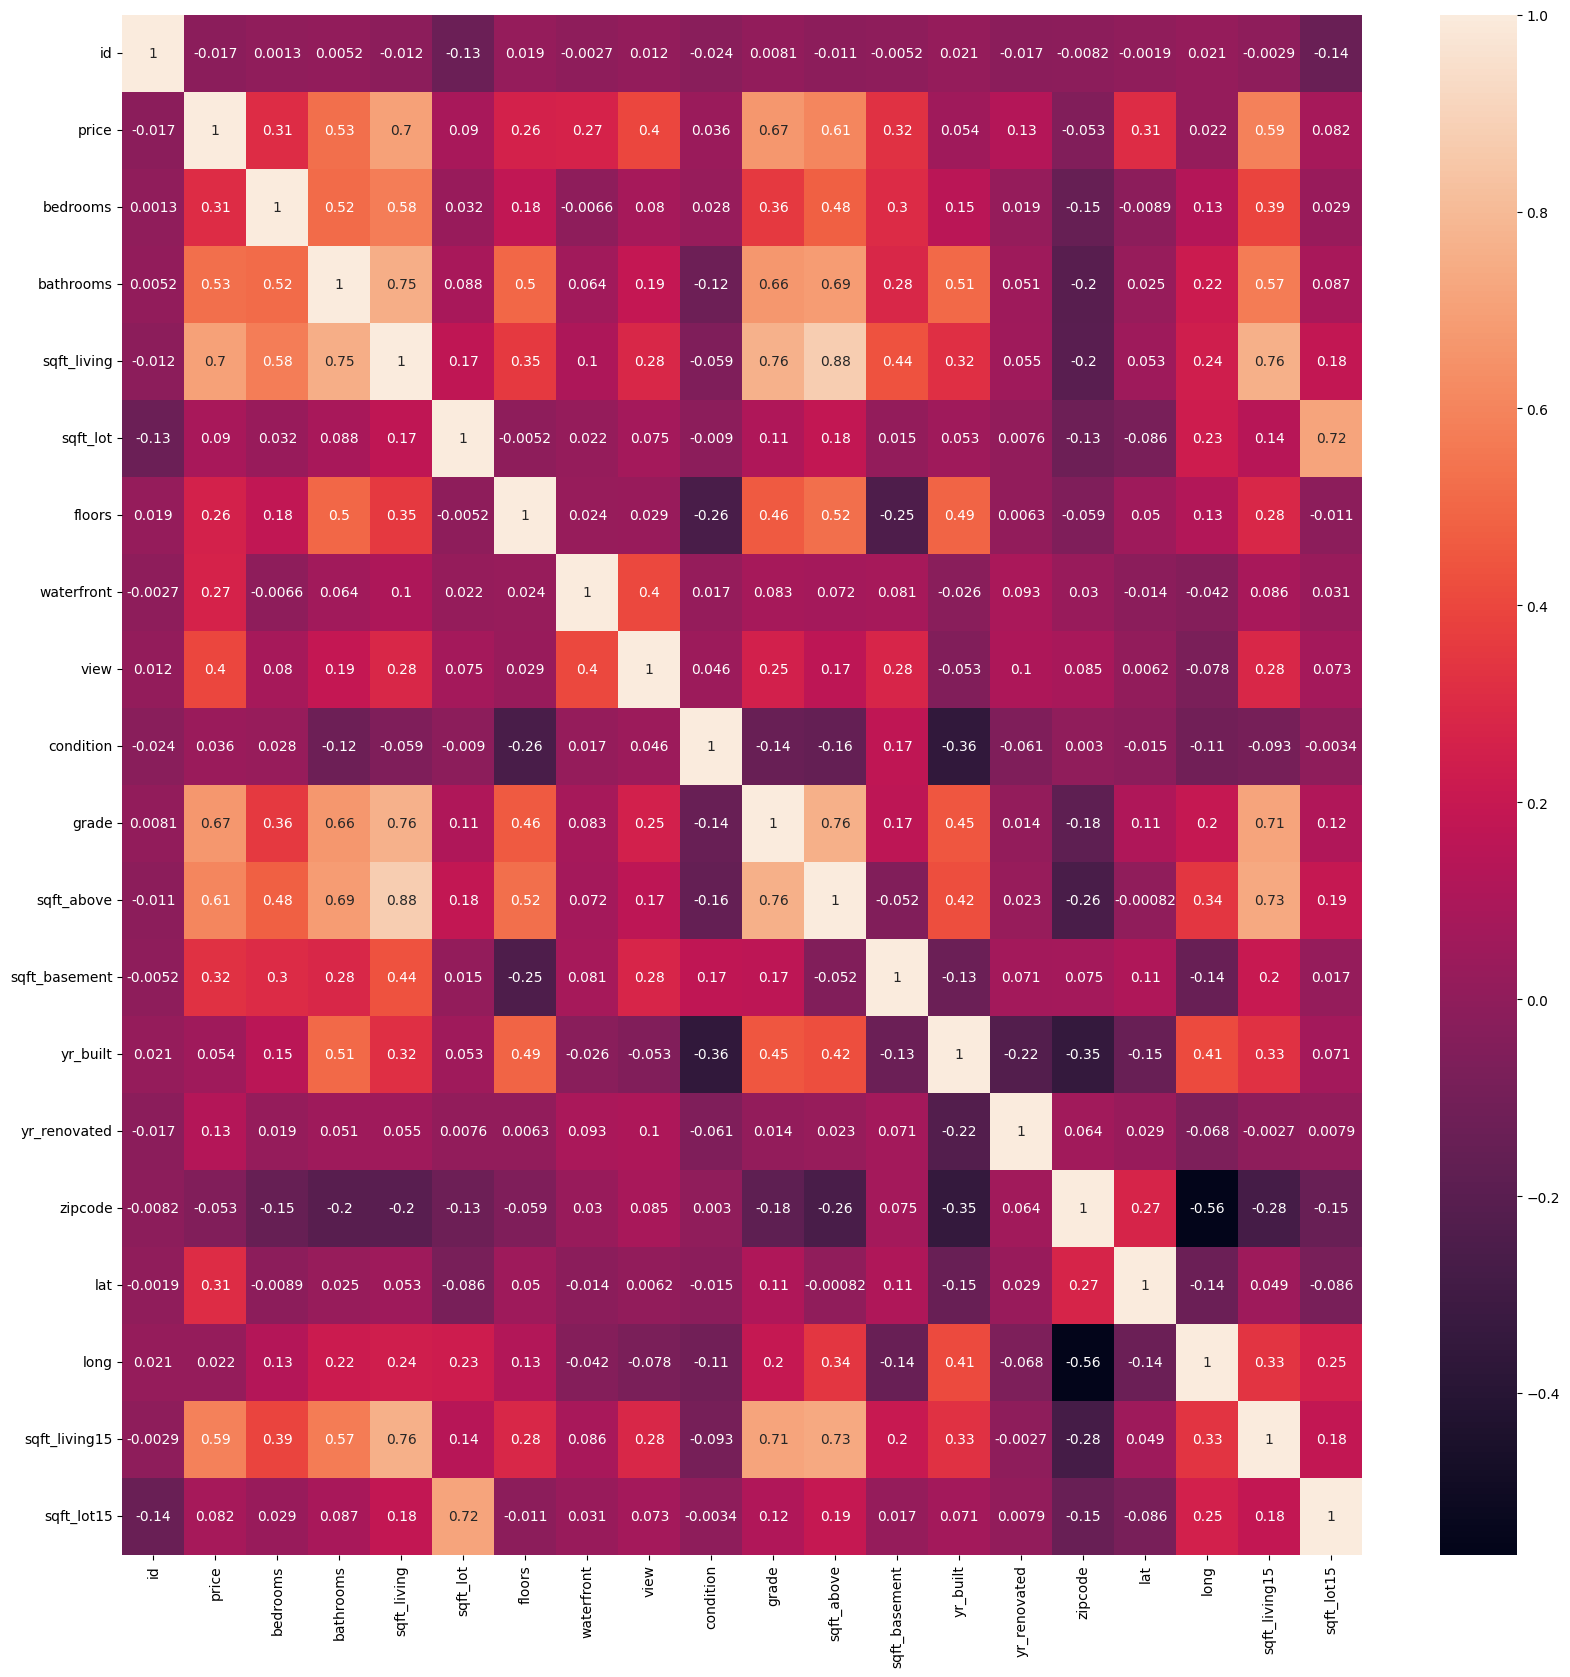

In [ ]:
figure = plt.figure(figsize=(20,20))
sns.heatmap(base_casas.corr(), annot=True)

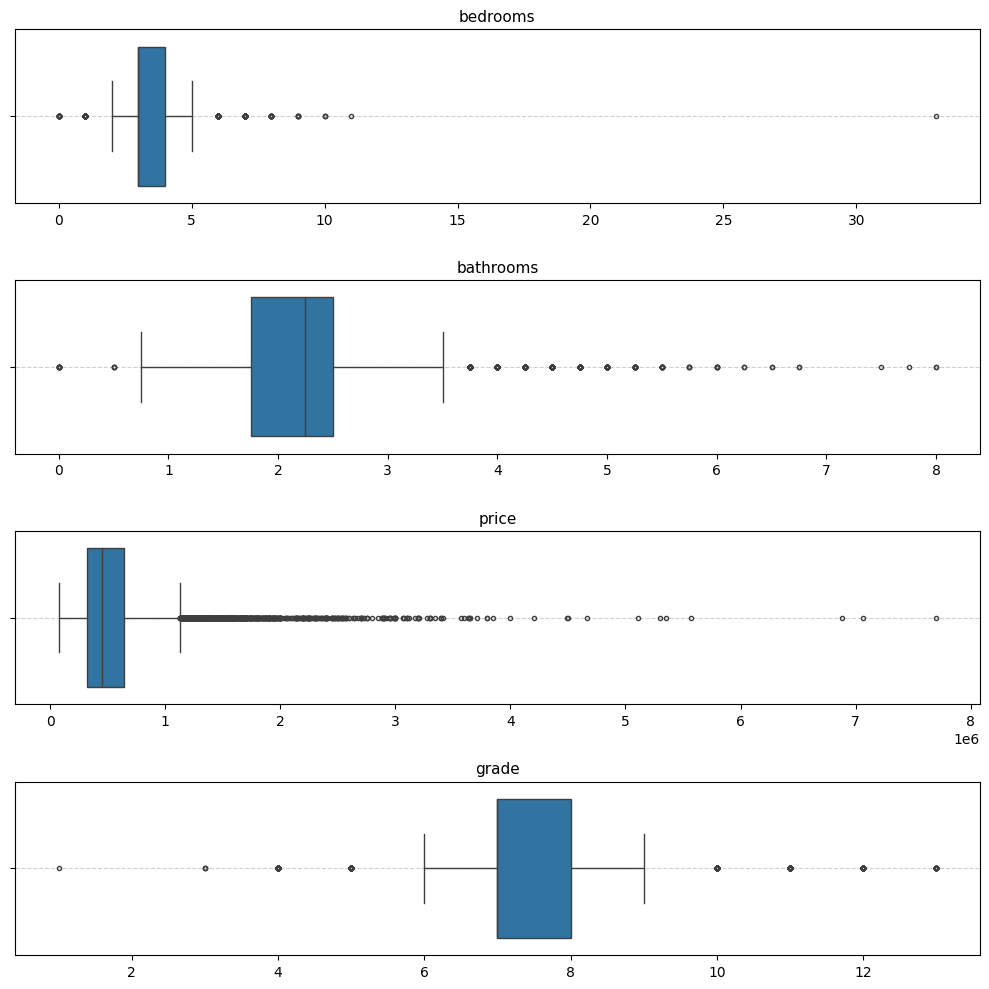

In [44]:
colunas = ['bedrooms', 'bathrooms', 'price', 'grade']

plt.figure(figsize=(10,10))

for i, coluna in enumerate(colunas, 1):
    plt.subplot(len(colunas), 1, i)
    sns.boxplot(data=base_casas, x=coluna, fliersize=3, linewidth=1)
    plt.title(coluna, fontsize=11)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()

In [46]:
x_casas = base_casas.iloc[:, 2:18].values

In [47]:
y_casas = base_casas.iloc[:, 1].values

In [48]:
from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size=0.3, random_state=0)

In [49]:
x_casas_treinamento.shape, x_casas_teste.shape

((15129, 16), (6484, 16))

In [50]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(x_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [51]:
regressor_multiplo_casas.score(x_casas_treinamento, y_casas_treinamento)

0.7029888085955007

In [52]:
regressor_multiplo_casas.score(x_casas_teste, y_casas_teste)

0.6885414149062644

In [53]:
previsoes = regressor_multiplo_casas.predict(x_casas_teste)
previsoes

array([ 383751.77768702, 1514216.17517451,  546921.96179115, ...,
        314968.5762327 ,  219405.55573559,  148128.83467043])

In [54]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_squared_error(y_casas_teste, previsoes)
print(f"MAE: {mae}")

MAE: 42760757001.53654


In [56]:
mse = mean_squared_error(y_casas_teste, previsoes)
print(f"MSE: {mse}")

MSE: 42760757001.53654


In [58]:
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 206786.74280895412
